In [2]:
using CSV
using DataFrames
using Plots
using StatsPlots
using GLM
using Statistics

## Load Advertising Data

In [3]:
adsData = CSV.File("dataset/Advertising.csv") |> DataFrame;

In [4]:
sales = adsData.sales;
tv = adsData.TV;

## Estimating β

In [5]:
function infer_params(x, y)
    x_bar = sum(x) / length(x)
    y_bar = sum(y) / length(y)
    
    xx = x .- x_bar
    yy = y .- y_bar
    
    β_1 = sum(xx .* yy) / sum(xx.^2)
    β_0 = y_bar - β_1 * x_bar
    
    return β_0, β_1
end

infer_params (generic function with 1 method)

In [6]:
β_0, β_1 = infer_params(tv, sales)

(7.032593549127696, 0.047536640433019736)

In [7]:
predict(inp, b0, b1) = begin
    inp * b1 + b0
end

line_0 = [-1, 300]
line_1 = [predict(-1, β_0, β_1), predict(300, β_0, β_1)]

2-element Vector{Float64}:
  6.985056908694676
 21.293585679033615

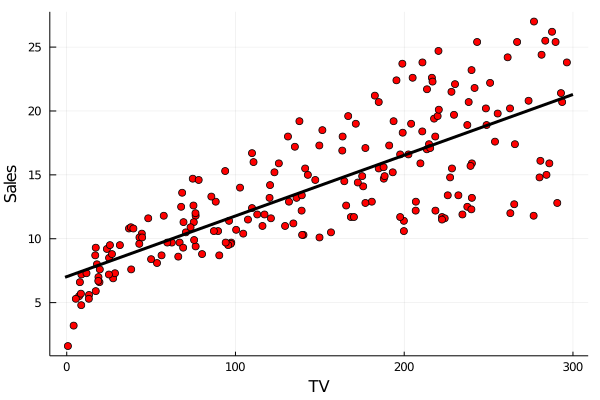

In [8]:
scatter(tv, sales, xlabel="TV", ylabel="Sales", legend=false, markercolor="red")
plot!(line_0, line_1, lw = 3, lc="black")

In [9]:
RSS(a_0, a_1) = sum((sales .- (a_0 .+ a_1 .* tv)).^2) 

RSS (generic function with 1 method)

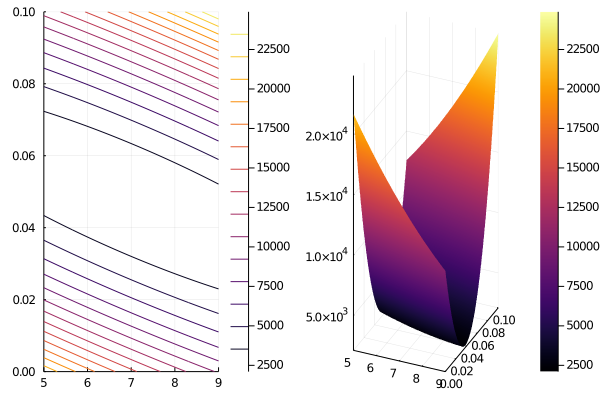

In [10]:
a_0 = range(5, stop=9, length=1000)
a_1 = range(0, stop=0.1, length=1000)

p1 = contour(a_0, a_1, RSS)
p2 = plot(a_0, a_1, RSS, st=:surface)
plot(p1, p2)

In [11]:
Y(X) = 2.0 .+ 3.0 .* X

function create_sample(n)
    X = rand(Float64, n) .* 4.0 .- 2.0
    ϵ = randn(Float64, n)
    return Y(X) + ϵ, X
end

y, x = create_sample(100)

([2.0415717433404033, 0.6176190863788664, 0.14772116018450204, 2.3777677813655416, 7.299746758457465, -2.3058862035296204, 3.766697884816296, 7.6979505020626195, 5.5809522881586755, 8.029605248270528  …  1.5673830014035284, 4.94082112007452, 2.2715756214712215, 0.2494447484786107, -2.4850346185734944, -4.505808992228591, 1.575013118007763, 3.755932225817651, -1.5036125866574217, -2.8888583778239383], [-0.036915342540258855, -0.653772535346385, -0.5118699747013391, 0.6827284950964145, 1.2947295489880561, -1.6072318545613076, 0.705245879983905, 1.970270258836785, 1.0414685277864502, 1.981967980664499  …  -0.477117338923005, 0.8033511557305886, 0.4252649101805259, -0.7480090042740608, -1.3648530680939608, -1.697749620504399, -0.286210355525891, 0.5965101996149711, -1.2729946259739622, -1.5456257355091596])

In [12]:
b0, b1 = infer_params(x, y)
line_0 = [-2, 2]
line_1 = [predict(-2, b0, b1), predict(2, b0, b1)]

2-element Vector{Float64}:
 -3.909820522648837
  7.9130111178367875

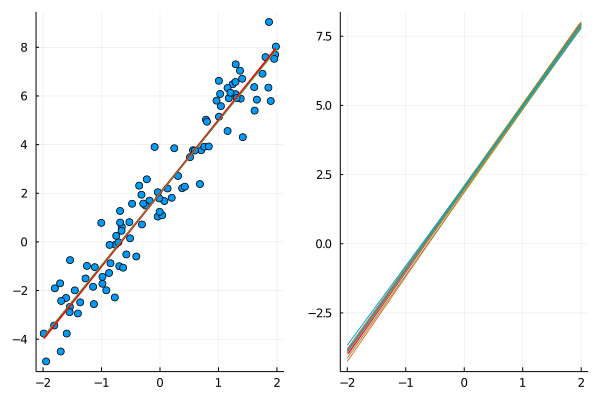

In [13]:
p1 = scatter(x, y)
p1 = plot!(x, Y(x), lw=2, lc="red")
p1 = plot!(line_0, line_1, legend=false)

p2 = plot(x, Y(x), lw=2, lc="red")
for i in 1:10
    y, x = create_sample(100)
    b0, b1 = infer_params(x, y)
    line_0 = [-2, 2]
    line_1 = [predict(-2, b0, b1), predict(2, b0, b1)]
    
    p2 = plot!(line_0, line_1)
end

plot(p1, p2, legend=false)

In [14]:
ols = lm(@formula(sales ~ TV), adsData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

sales ~ 1 + TV

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  7.03259    0.457843    15.36    <1e-34  6.12972    7.93547
TV           0.0475366  0.00269061  17.67    <1e-41  0.0422307  0.0528426
─────────────────────────────────────────────────────────────────────────

## 3.3 Multiple Linear Regression

In [15]:
ols = lm(@formula(sales ~ radio), adsData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

sales ~ 1 + radio

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  9.31164    0.5629     16.54    <1e-38   8.20159   10.4217
radio        0.202496   0.0204113   9.92    <1e-18   0.162244   0.242747
────────────────────────────────────────────────────────────────────────

In [16]:
ols = lm(@formula(sales ~ newspaper), adsData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

sales ~ 1 + newspaper

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  12.3514      0.62142    19.88    <1e-48  11.126      13.5769
newspaper     0.0546931   0.0165757   3.30    0.0011   0.0220055   0.0873807
────────────────────────────────────────────────────────────────────────────

In [17]:
ols = lm(@formula(sales ~  TV + radio + newspaper), adsData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

sales ~ 1 + TV + radio + newspaper

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   2.93889     0.311908     9.42    <1e-16   2.32376    3.55402
TV            0.0457646   0.0013949   32.81    <1e-80   0.0430137  0.0485156
radio         0.18853     0.00861123  21.89    <1e-53   0.171547   0.205513
newspaper    -0.00103749  0.00587101  -0.18    0.8599  -0.012616   0.010541
────────────────────────────────────────────────────────────────────────────

In [18]:
# Table 3.5: correlation matrix
cor(Matrix(adsData[:, ["TV", "radio", "newspaper", "sales"]]))

4×4 Matrix{Float64}:
 1.0        0.0548087  0.0566479  0.782224
 0.0548087  1.0        0.354104   0.576223
 0.0566479  0.354104   1.0        0.228299
 0.782224   0.576223   0.228299   1.0

In [19]:
r2(ols)

0.8972106381789521

## Sec 3.3

In [20]:
creditData = CSV.File("dataset/Credit.csv") |> DataFrame;

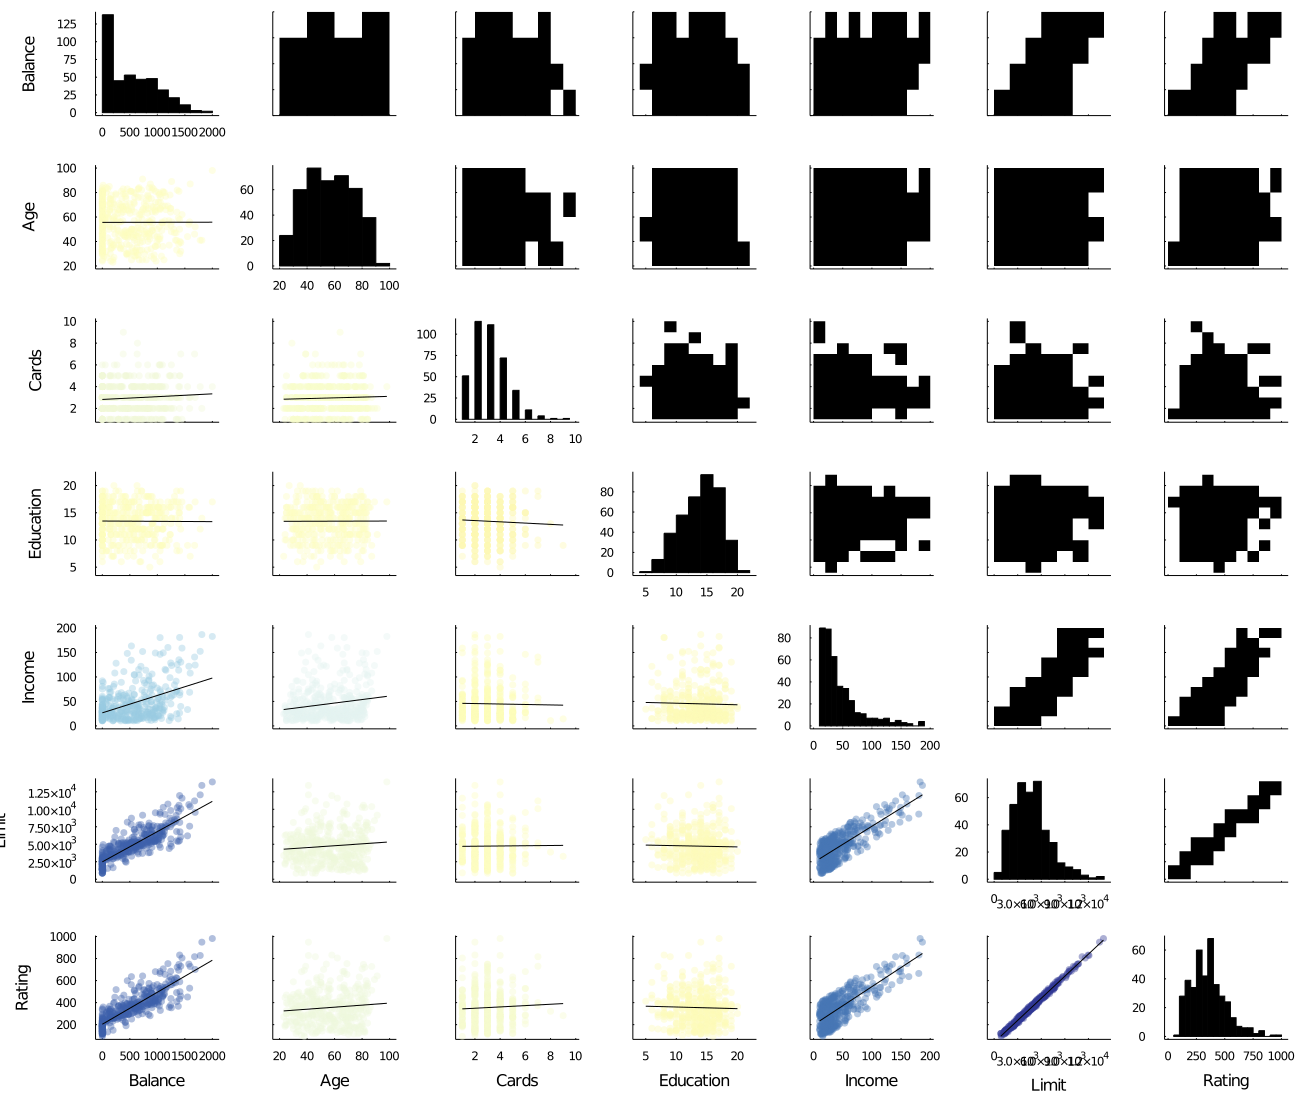

In [21]:
gr(size = (1300, 1100))

@df creditData corrplot([:Balance :Age :Cards :Education :Income :Limit :Rating], grid = false)

In [22]:
ols = lm(@formula(Balance ~ Gender), creditData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Balance ~ 1 + Gender

Coefficients:
───────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)     509.803      33.1281  15.39    <1e-41   444.675     574.931
Gender: Female   19.7331     46.0512   0.43    0.6685   -70.8009    110.267
───────────────────────────────────────────────────────────────────────────

In [23]:
ols = lm(@formula(Balance ~ Ethnicity), creditData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Balance ~ 1 + Ethnicity

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)           531.0        46.3187  11.46    <1e-25    439.939    622.061
Ethnicity: Asian      -18.6863     65.0211  -0.29    0.7740   -146.515    109.142
Ethnicity: Caucasian  -12.5025     56.681   -0.22    0.8255   -123.935     98.93
─────────────────────────────────────────────────────────────────────────────────

In [24]:
# Remove the additive assumptions
ols = lm(@formula(sales ~  TV + radio + TV * radio), adsData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

sales ~ 1 + TV + radio + TV & radio

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  6.75022     0.247871    27.23    <1e-67  6.26138      7.23906
TV           0.0191011   0.00150415  12.70    <1e-26  0.0161347    0.0220675
radio        0.0288603   0.00890527   3.24    0.0014  0.0112979    0.0464228
TV & radio   0.00108649  5.24204e-5  20.73    <1e-50  0.000983114  0.00118988
─────────────────────────────────────────────────────────────────────────────

In [25]:
r2(ols)

0.9677905498482523

## Section 3.3.2

In [26]:
autoData = CSV.File("dataset/Auto.csv"; missingstring="?") |> DataFrame;
# ? in Auto.csv is treated as missing values

In [27]:
ols = lm(@formula(mpg ~  horsepower + horsepower^2), autoData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

mpg ~ 1 + horsepower + :(horsepower ^ 2)

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)     56.9001      1.80043       31.60    <1e-99  53.3603       60.4399
horsepower      -0.46619     0.0311246    -14.98    <1e-39  -0.527383     -0.404996
horsepower ^ 2   0.00123054  0.000122076   10.08    <1e-20   0.000990525   0.00147055
─────────────────────────────────────────────────────────────────────────────────────

In [28]:
ols5 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5), autoData);
ols1 = lm(@formula(mpg ~ horsepower), autoData);

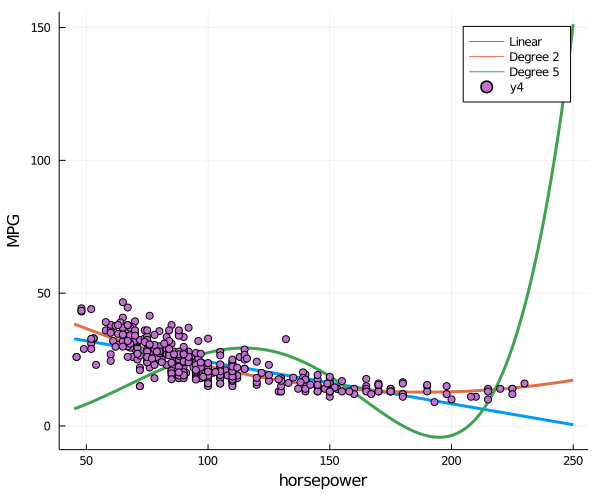

In [29]:
gr(size = (600, 500))

params1 = coef(ols1)
params2 = coef(ols)
params5 = coef(ols5)

inp = collect(45:0.1:250;) # `range` can be used. Note: `;` is very important https://stackoverflow.com/questions/55438134/creating-arrays-from-ranges-in-julia-without-using-collect

y1 = params1[1] .+ params1[2] .* inp
y2 = params2[1] .+ params2[2] .* inp + params2[3] .* (inp.^2)
y5 = params5[1] .+ params5[2] .* inp + params5[3] .* (inp.^2) + params5[4] .* (inp.^3) + params5[5] .* (inp.^4) + params5[6] .* (inp.^5)

plot(inp, hcat(y1, y2, y5), label = ["Linear" "Degree 2" "Degree 5"], lw = 3, legend=true)
scatter!(autoData.horsepower, autoData.mpg, xlabel="horsepower", ylabel="MPG")

In [30]:
y1_hat = predict(ols1)
y2_hat = predict(ols)

clean_autoData = dropmissing(autoData, :horsepower)
hp = clean_autoData.horsepower
mpg = clean_autoData.mpg

e1_hat = mpg .- y1_hat
e2_hat = mpg .- y2_hat

gr(size = (1000, 500))

p1 = scatter(y1_hat, e1_hat, title="Residual Plot for Linear Fit", xlabel="Fitted values", ylabel="Residuals", legend=false)
p2 = scatter(y2_hat, e2_hat, title="Residual Plot for Quadratic Fit", xlabel="Fitted values", ylabel="Residuals", legend=false)
plot(p1, p2)

## TODO: add smooth fit. Maybe LOESS

LoadError: MethodError: no method matching predict(::StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}})
[0mClosest candidates are:
[0m  predict(::Any, [91m::Any[39m, [91m::Any[39m) at In[7]:1

In [2]:
# TODO: should we plot Fig 3.11 
# TODO: Fig 3.12 3.13 are quite "easy"

## Section 3.3

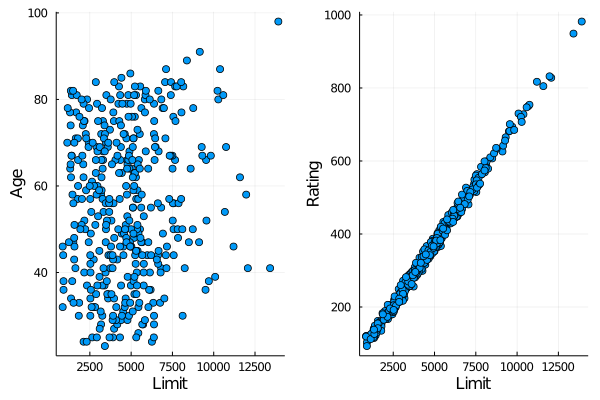

In [7]:
# Figure 3.14
age = creditData.Age
limit = creditData.Limit
rating = creditData.Rating

p1 = scatter(limit, age, xlabel="Limit", ylabel="Age", legend=false)
p2 = scatter(limit, rating, xlabel="Limit", ylabel="Rating", legend=false)
plot(p1, p2)

In [8]:
# Table 3.11
ols = lm(@formula(Balance ~ Age + Limit), creditData)
print(ols)
ols = lm(@formula(Balance ~ Rating + Limit), creditData)
print(ols)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Balance ~ 1 + Age + Limit

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -173.411     43.8284      -3.96    <1e-4   -259.576     -87.2462
Age            -2.29149    0.672485    -3.41    0.0007    -3.61356    -0.96941
Limit           0.173365   0.00502566  34.50    <1e-99     0.163485    0.183245
───────────────────────────────────────────────────────────────────────────────StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Balance ~ 1 + Rating + Limit

Coefficients:
───────────────────

In [16]:
RSS_age_limit(β_1, β_2) = sum( (creditData.Balance .- β_1 .* creditData.Age .- β_2 .* creditData.Limit .+ 173.411).^2 )
RSS_rating_limit(β_1, β_2) = sum((creditData.Balance .- β_1 .* creditData.Rating .- β_2 .* creditData.Limit .+ 377.537).^2)

RSS_rating_limit (generic function with 1 method)

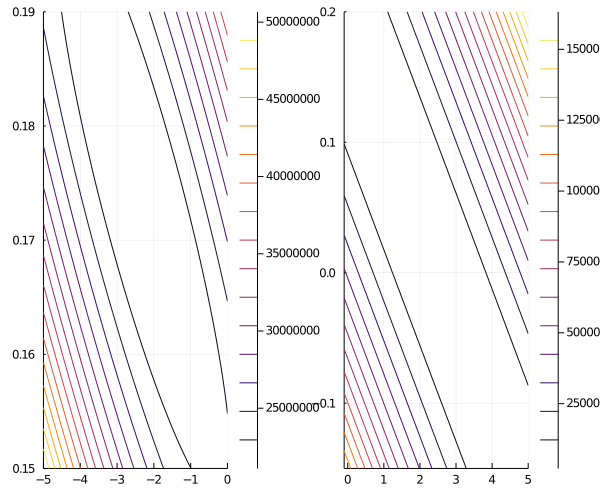

In [19]:
gr(size = (600, 500))

b_0 = range(-5, stop=0, length=1000)
b_1 = range(0.15, stop=0.19, length=1000)

a_0 = -0.15:0.01:0.2
a_1 = -0.1:0.01:5
# p1 = contour(b_0, b_1, RSS_age_limit)
p1 = contour(b_0, b_1, RSS_age_limit)
p2 = contour(a_1, a_0, RSS_rating_limit)

plot(p1, p2)

In [ ]:
## TODO: Fig 3.17 3.18 3.19 3.20 should be done